In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,make_scorer,accuracy_score ,jaccard_score,r2_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold ,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from pandas import read_csv

In [2]:
filename1 = 'UofT_nodes.csv'
filename2 = 'UofT_occupation_risk.csv'

In [3]:
KYC = read_csv(filename1, encoding = "ISO-8859-1")
OCC=read_csv(filename2, encoding = "ISO-8859-1")

In [4]:
OCC.shape

(841, 2)

In [5]:
OCC


,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low
...,...,...
836,836,Low
837,837,Low
838,838,Low
839,839,High


In [6]:
KYC.shape

(1000000, 20)

In [7]:
KYC.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


In [8]:
Data=KYC.copy()

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                993616 non-null   float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

In [10]:
KYC['RISK'].value_counts(dropna=False)

low       600000
medium    350000
high       50000
Name: RISK, dtype: int64

Text(0.5, 0, 'Risk level')

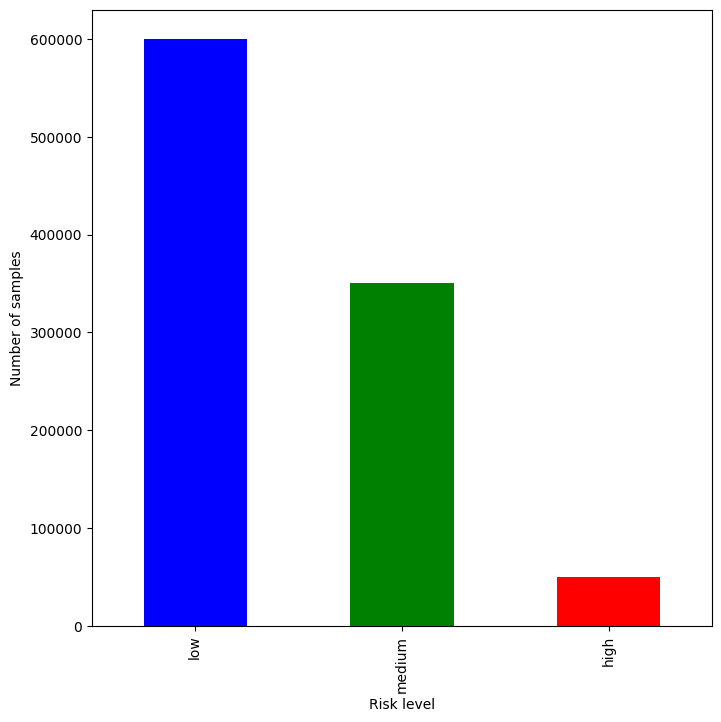

In [11]:

RISK_level=KYC['RISK'].value_counts(dropna=False)
RISK_level.plot(kind="bar", figsize=(8,8),title='',color=['blue', 'green', 'red'])
plt.ylabel('Number of samples')
plt.xlabel('Risk level')

Text(0.5, 0, 'Risk level')

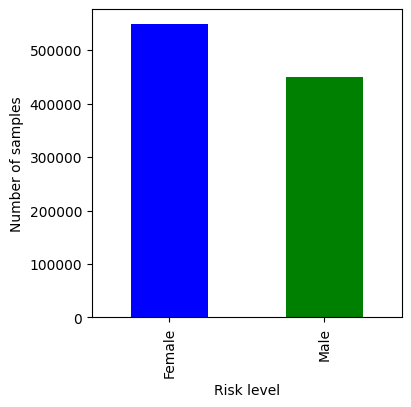

In [12]:
Data2=KYC['GENDER'].value_counts(dropna=True)
Data2.plot(kind="bar", figsize=(4,4),title='',color=['blue', 'green'])
plt.ylabel('Number of samples')
plt.xlabel('Risk level')

In [13]:
Male_2020=KYC[KYC['GENDER']=='Male']
Female_2020=KYC[KYC['GENDER']=='Female']
#Male_2020['Salary']=Male_2020['Salary'].astype(int)
Data2=Male_2020['RISK'].value_counts(dropna=True)
Data3=Female_2020['RISK'].value_counts(dropna=True)
Data3.index

Index(['low', 'medium', 'high'], dtype='object')

In [14]:
Female_2020['RISK'].value_counts().index

Index(['low', 'medium', 'high'], dtype='object')

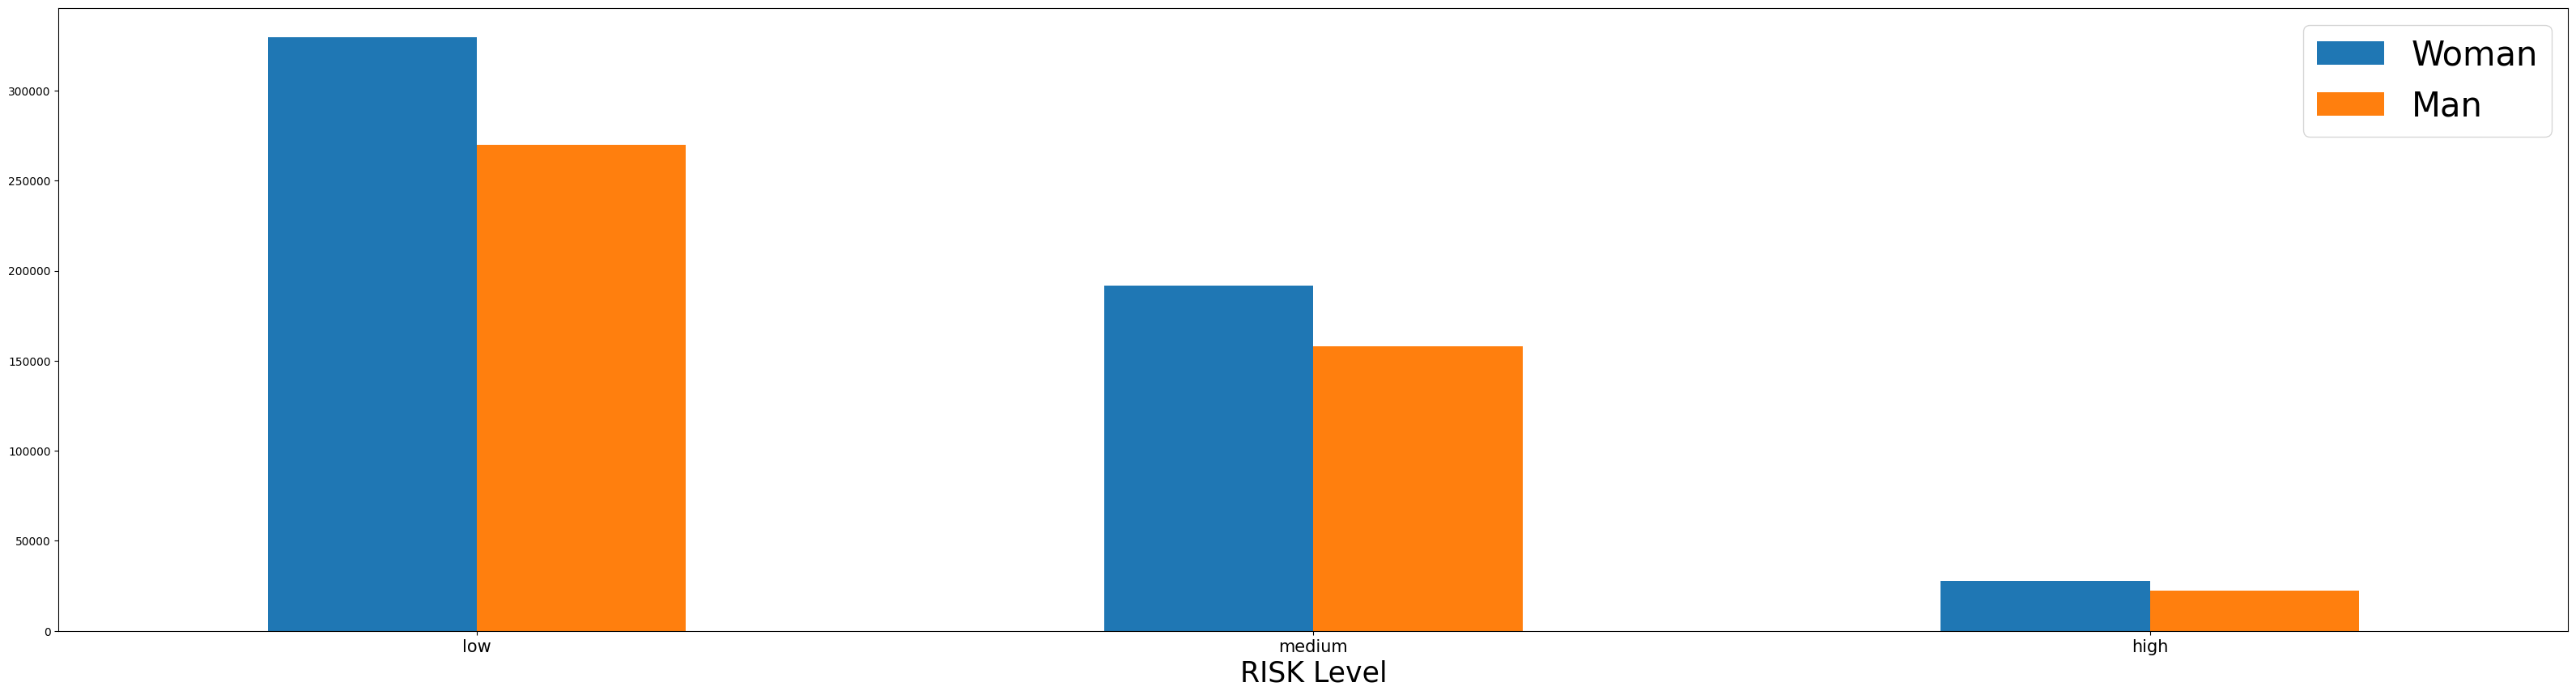

In [15]:
dic={'Risk':Data2.index, 'Woman':Data3.values, 'Man':Data2.values}
df=pd.DataFrame(dic)
ax = df.plot.bar(rot=0,figsize=(40,10))
plt.xlabel("RISK Level", fontsize=25)
plt.ylabel("", fontsize=25)
plt.title("", fontsize=25)
plt.rc('ytick', labelsize=20) 
plt.legend(fontsize=30)
ax.set_xticklabels(list(Data['RISK'].unique()), fontsize=15)

plt.show() 

In [16]:
merged_df = pd.merge(Data, OCC, left_on='OCPTN_NM', right_on='code', how='left')

# Replace NaN values in 'occupation_risk' column with 'unknown'
merged_df['occupation_risk'].fillna('unknown', inplace=True)

# Update the 'OCPTN_NM' column with the values in the 'occupation_risk' column
Data['OCPTN_NM'] = merged_df['occupation_risk']

In [17]:
Data.OCPTN_NM.value_counts(dropna=False)

Low         640328
High        335300
Moderate     17988
unknown       6384
Name: OCPTN_NM, dtype: int64

In [18]:
Data.RISK.value_counts(dropna=False)

low       600000
medium    350000
high       50000
Name: RISK, dtype: int64

In [19]:
Data_set = Data.iloc[:,:] 
#Data_set['Q24_Encoded']=Data['Q24_Encoded'].astype(int)
cols = Data_set.columns.tolist()
cols=cols[2:19]
cols=[x for x in cols if x !='NAME']

Data_set2 = Data_set[cols]
#Data_set3 = pd.get_dummies(Data_set2)
Data_set2

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,GENDER
0,High,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,Female
1,High,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Male
2,High,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Male
3,High,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,Female
4,High,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Low,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Male
999996,Low,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Male
999997,High,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Female
999998,High,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,Male


/tmp/ipykernel_1726614/3674666855.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


RISK_high        1.000000
RISK_low         0.280976
CASH_SUM_IN      0.203362
RISK_medium      0.168345
CASH_CNT_IN      0.159625
PEP_FL           0.122055
WIRES_CNT_OUT    0.080909
OCPTN_NM_High    0.048061
OCPTN_NM_Low     0.046441
CASH_SUM_OUT     0.042955
Name: RISK_high, dtype: float64

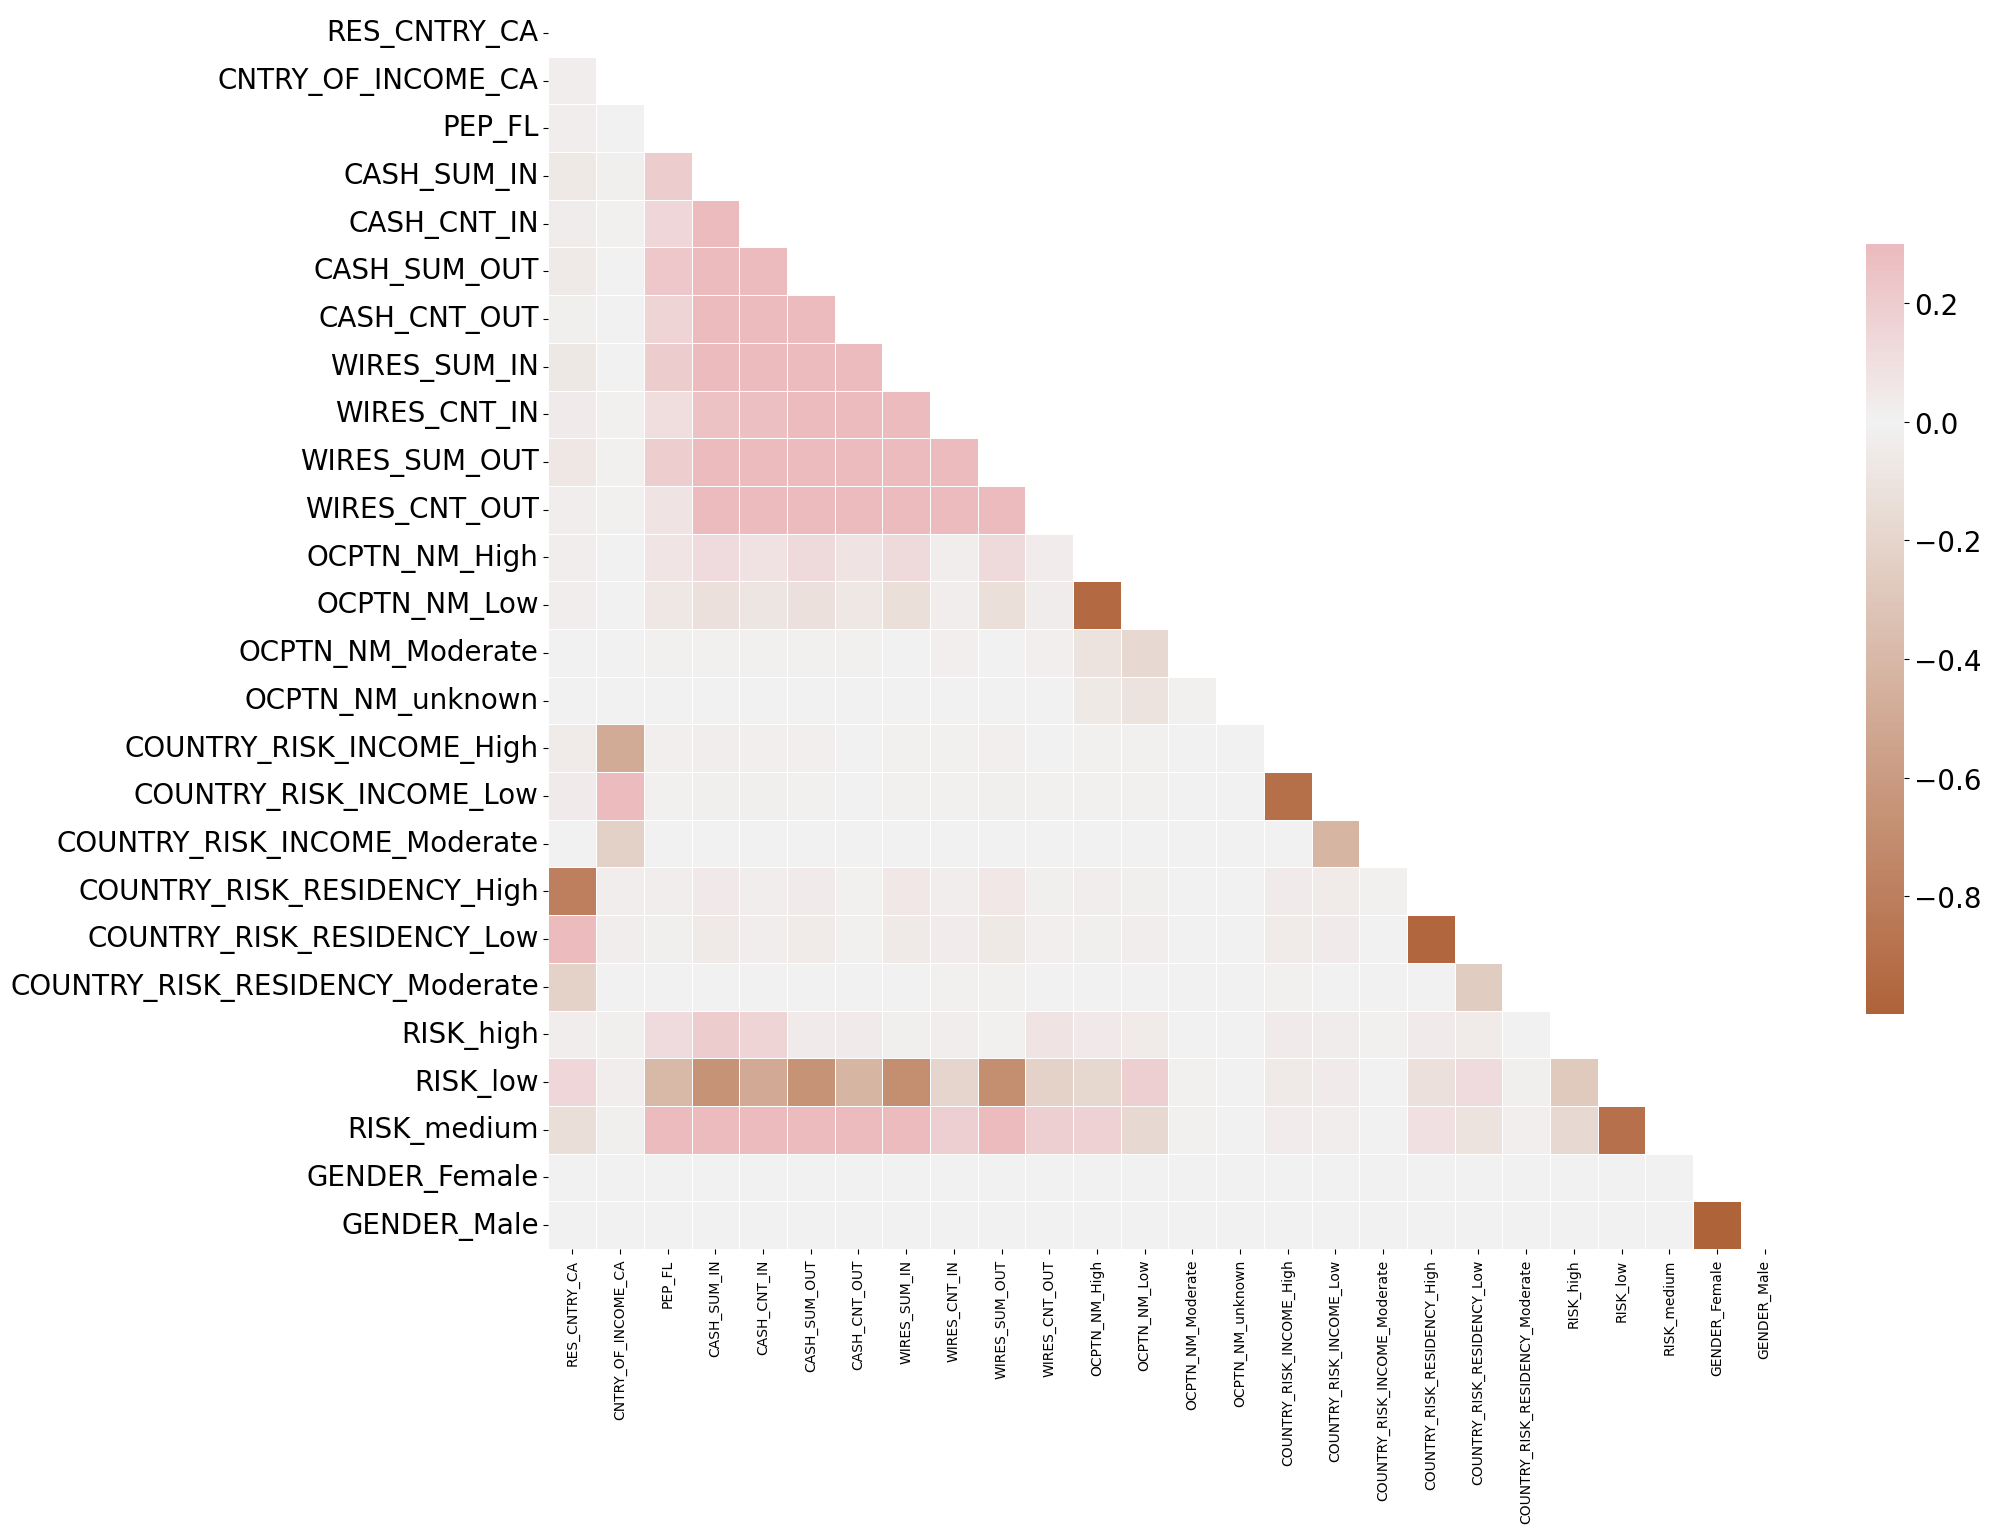

In [20]:


# Compute the correlation matrix

Data_set3 = pd.get_dummies(Data_set2)
corr = Data_set3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

pd.DataFrame(abs(corr)).RISK_high.sort_values(ascending=False)[:10]

The correlation between gender and risk level is low so we drop the gender column


/tmp/ipykernel_1726614/3411431546.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), annot=True, square=True)


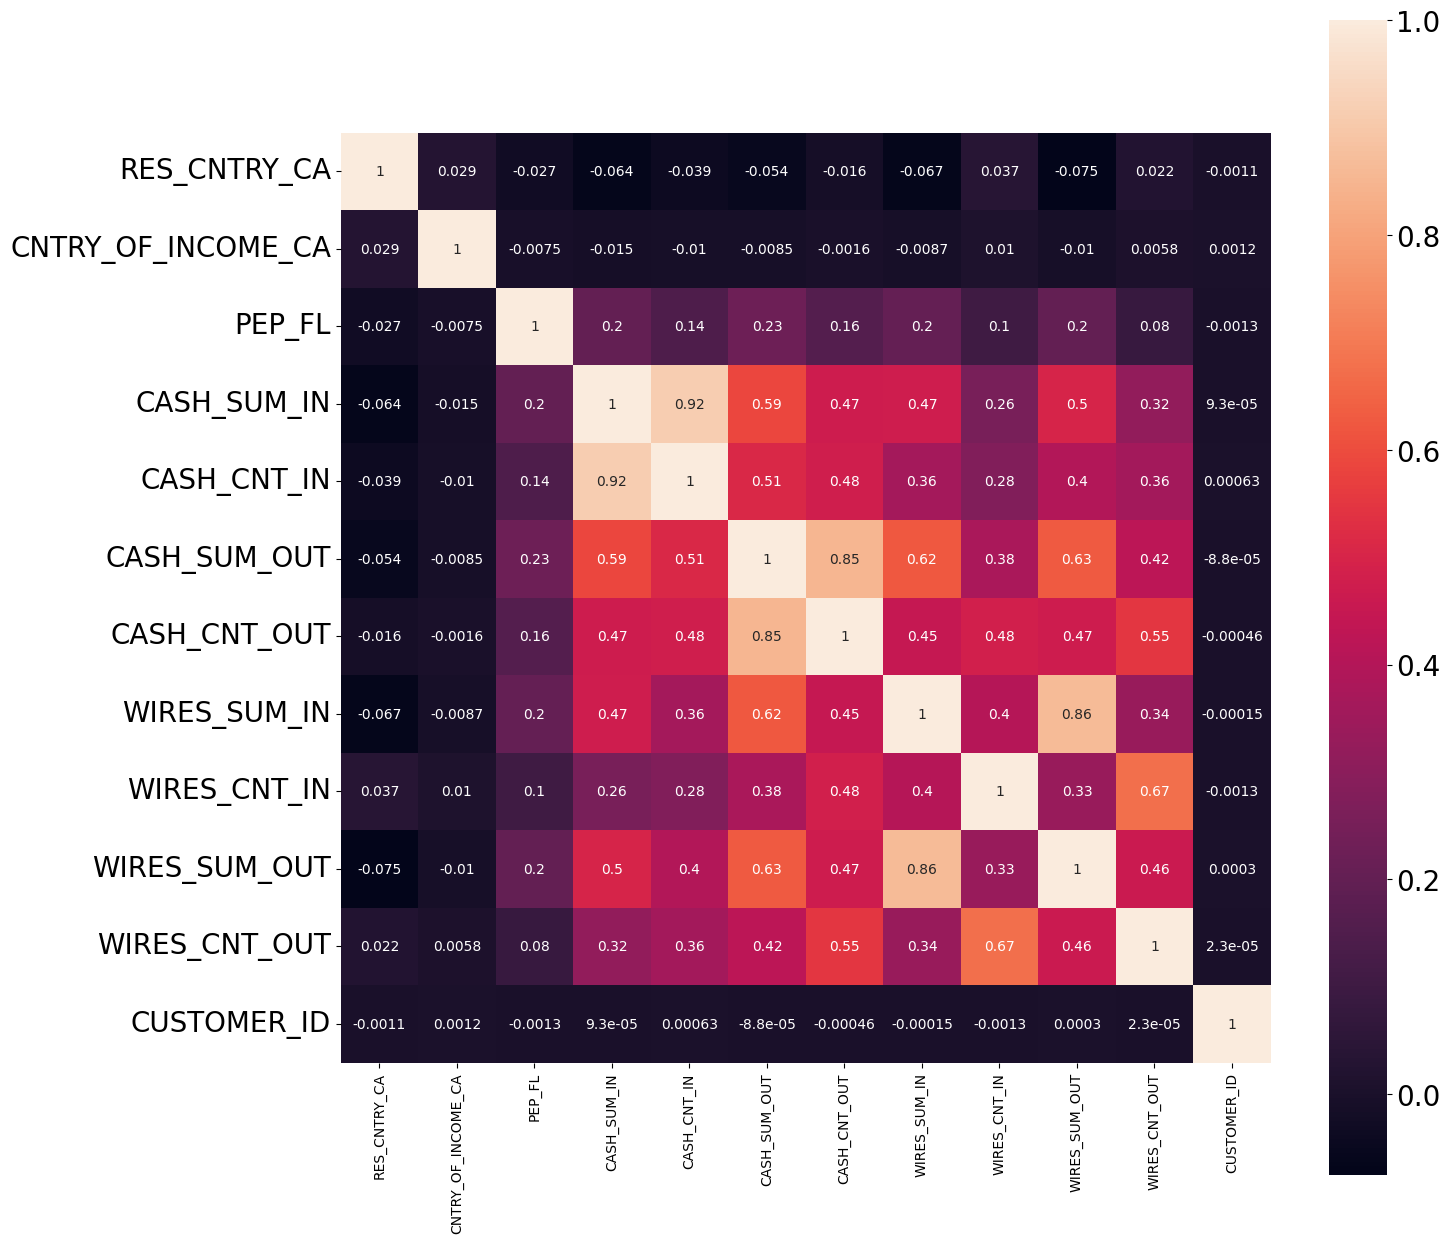

In [21]:
#correlation matrix
plt.subplots(figsize=(15, 15))
sns.heatmap(Data.corr(), annot=True, square=True)
plt.show()

In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                1000000 non-null  object 
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

## Data Cleaning

In [23]:

#We drop BIRTH_DT, CUST_ADD_DT, NAME, GENDER, CUSTOMER_ID
Data_set = Data.iloc[:,:] 

cols = Data_set.columns.tolist()
cols=cols[2:17]
print(cols)
cols=[x for x in cols if x !='NAME']

Sub_Set = Data_set[cols]

['OCPTN_NM', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_CNT_IN', 'CASH_SUM_OUT', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_CNT_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'RISK']


In [24]:
Sub_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   OCPTN_NM                1000000 non-null  object 
 1   RES_CNTRY_CA            1000000 non-null  int64  
 2   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 3   PEP_FL                  1000000 non-null  float64
 4   CASH_SUM_IN             1000000 non-null  float64
 5   CASH_CNT_IN             1000000 non-null  float64
 6   CASH_SUM_OUT            1000000 non-null  float64
 7   CASH_CNT_OUT            1000000 non-null  float64
 8   WIRES_SUM_IN            1000000 non-null  float64
 9   WIRES_CNT_IN            1000000 non-null  float64
 10  WIRES_SUM_OUT           1000000 non-null  float64
 11  WIRES_CNT_OUT           1000000 non-null  float64
 12  COUNTRY_RISK_INCOME     1000000 non-null  object 
 13  COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 14  RIS

In [25]:
#ome_hot_encoding
Data_set_onehot=pd.get_dummies(Sub_Set)


In [26]:
Data_set_onehot.head()

,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,...,OCPTN_NM_unknown,COUNTRY_RISK_INCOME_High,COUNTRY_RISK_INCOME_Low,COUNTRY_RISK_INCOME_Moderate,COUNTRY_RISK_RESIDENCY_High,COUNTRY_RISK_RESIDENCY_Low,COUNTRY_RISK_RESIDENCY_Moderate,RISK_high,RISK_low,RISK_medium
0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,...,0,0,1,0,0,1,0,0,1,0
1,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,...,0,0,1,0,0,1,0,0,1,0
2,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,...,0,0,1,0,0,1,0,0,1,0
3,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,...,0,0,1,0,0,1,0,0,1,0
4,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,...,0,0,1,0,0,1,0,0,1,0


In [27]:
Data_set_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   RES_CNTRY_CA                     1000000 non-null  int64  
 1   CNTRY_OF_INCOME_CA               1000000 non-null  int64  
 2   PEP_FL                           1000000 non-null  float64
 3   CASH_SUM_IN                      1000000 non-null  float64
 4   CASH_CNT_IN                      1000000 non-null  float64
 5   CASH_SUM_OUT                     1000000 non-null  float64
 6   CASH_CNT_OUT                     1000000 non-null  float64
 7   WIRES_SUM_IN                     1000000 non-null  float64
 8   WIRES_CNT_IN                     1000000 non-null  float64
 9   WIRES_SUM_OUT                    1000000 non-null  float64
 10  WIRES_CNT_OUT                    1000000 non-null  float64
 11  OCPTN_NM_High                    1000000 non-null  

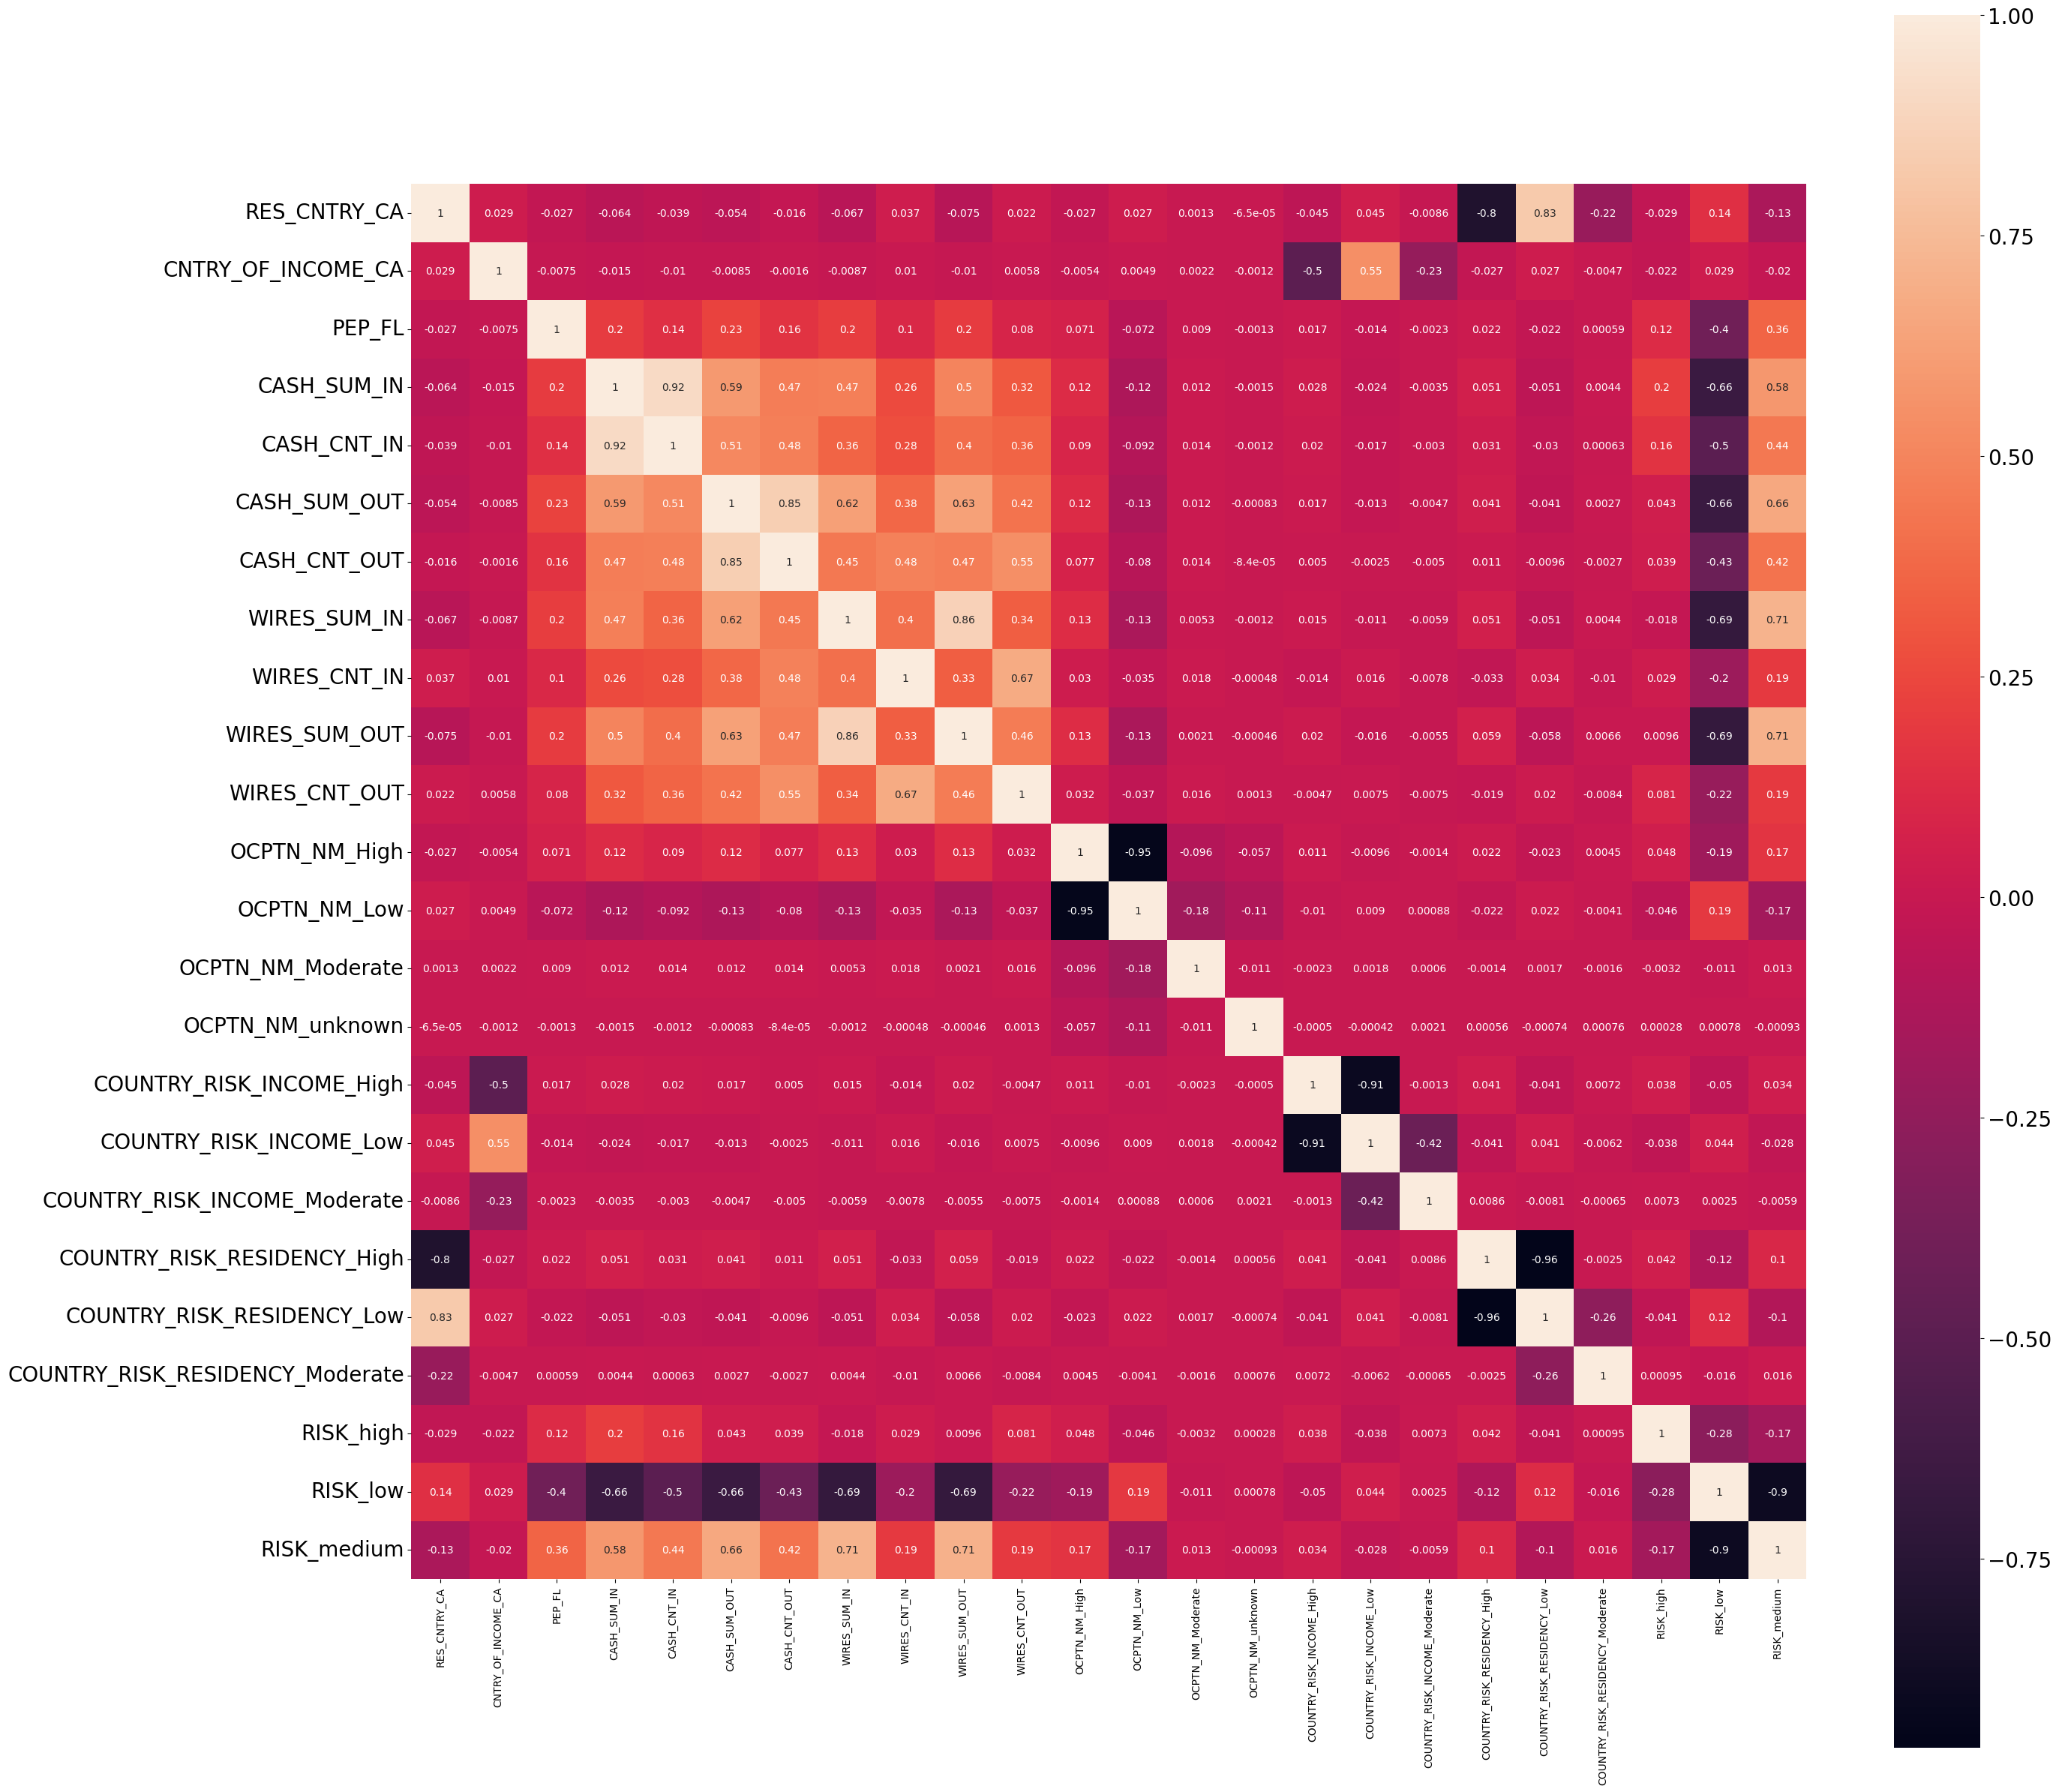

In [28]:
plt.subplots(figsize=(30, 30))
sns.heatmap(Data_set_onehot.corr(), annot=True, square=True)
plt.show()

In [29]:
Sub_Set.OCPTN_NM.value_counts(dropna=False)

Low         640328
High        335300
Moderate     17988
unknown       6384
Name: OCPTN_NM, dtype: int64

we have 6384 samples which have unknown occupation number

In [30]:
# Based on the correlation plot, we put OCPTN_NM= low for those samples which have RISK=low and we put OCPTN_NM= high for those samples which have RISK=medium 
Sub_Set.loc[Sub_Set[(Sub_Set.OCPTN_NM=='unknown')&(Sub_Set.RISK=='low')].index, 'OCPTN_NM']='Low'
Sub_Set.loc[Sub_Set[(Sub_Set.OCPTN_NM=='unknown')&(Sub_Set.RISK=='medium')].index, 'OCPTN_NM']='High'

In [31]:
Sub_Set.OCPTN_NM.value_counts(dropna=False)

Low         644189
High        337499
Moderate     17988
unknown        324
Name: OCPTN_NM, dtype: int64

In [32]:
Sub_Set[(Sub_Set.OCPTN_NM=='unknown')&(Sub_Set.RISK=='high')].shape

(324, 15)

324 samples with unknown OCPTN_NM left. These samples have high risk level

The below cell shows that contury of income for most of high risk samples are Canada 

In [33]:
Sub_Set[(Sub_Set.RISK=='high')].CNTRY_OF_INCOME_CA.value_counts(dropna=False)

1    48915
0     1085
Name: CNTRY_OF_INCOME_CA, dtype: int64

Lets check the conutry of income for those sample with OCPTN_NM=unknown and RISK=high

In [34]:
Sub_Set[(Sub_Set.OCPTN_NM=='unknown')&(Sub_Set.RISK=='high')].CNTRY_OF_INCOME_CA.value_counts(dropna=False)

1    317
0      7
Name: CNTRY_OF_INCOME_CA, dtype: int64

So we put OCPTN_NM=high for these 324 samples

In [35]:
Sub_Set.loc[Sub_Set[(Sub_Set.OCPTN_NM=='unknown')&(Sub_Set.RISK=='high')].index, 'OCPTN_NM']='High'

So there is no unkown values in this column

In [36]:
Sub_Set.OCPTN_NM.value_counts(dropna=False)

Low         644189
High        337823
Moderate     17988
Name: OCPTN_NM, dtype: int64

Now we can start to do the feature engineering and then build the model